<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/rad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

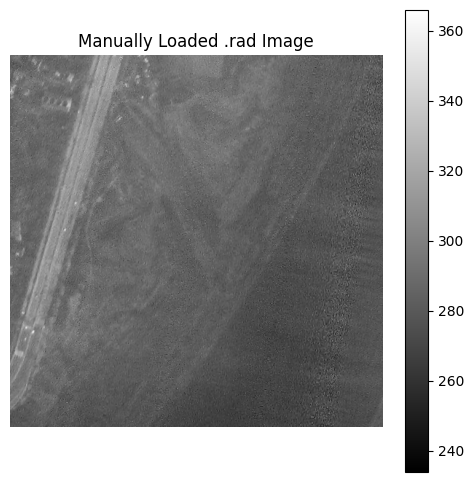

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define path and parameters
file_path = '/content/band1_image3.rad'  # uploaded file
width, height = 512, 512                 # adjust if needed
# dtype = np.uint8                         # or try np.float32, np.uint16
dtype = np.uint16 # Trying uint16 as suggested by the error

# Step 2: Load the binary data
with open(file_path, 'rb') as f:
    data = np.fromfile(f, dtype=dtype)

# Step 3: Reshape into 2D image
image = data.reshape((height, width))

# Step 4: Visualize using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Manually Loaded .rad Image')
plt.axis('off')
plt.colorbar()
plt.show()

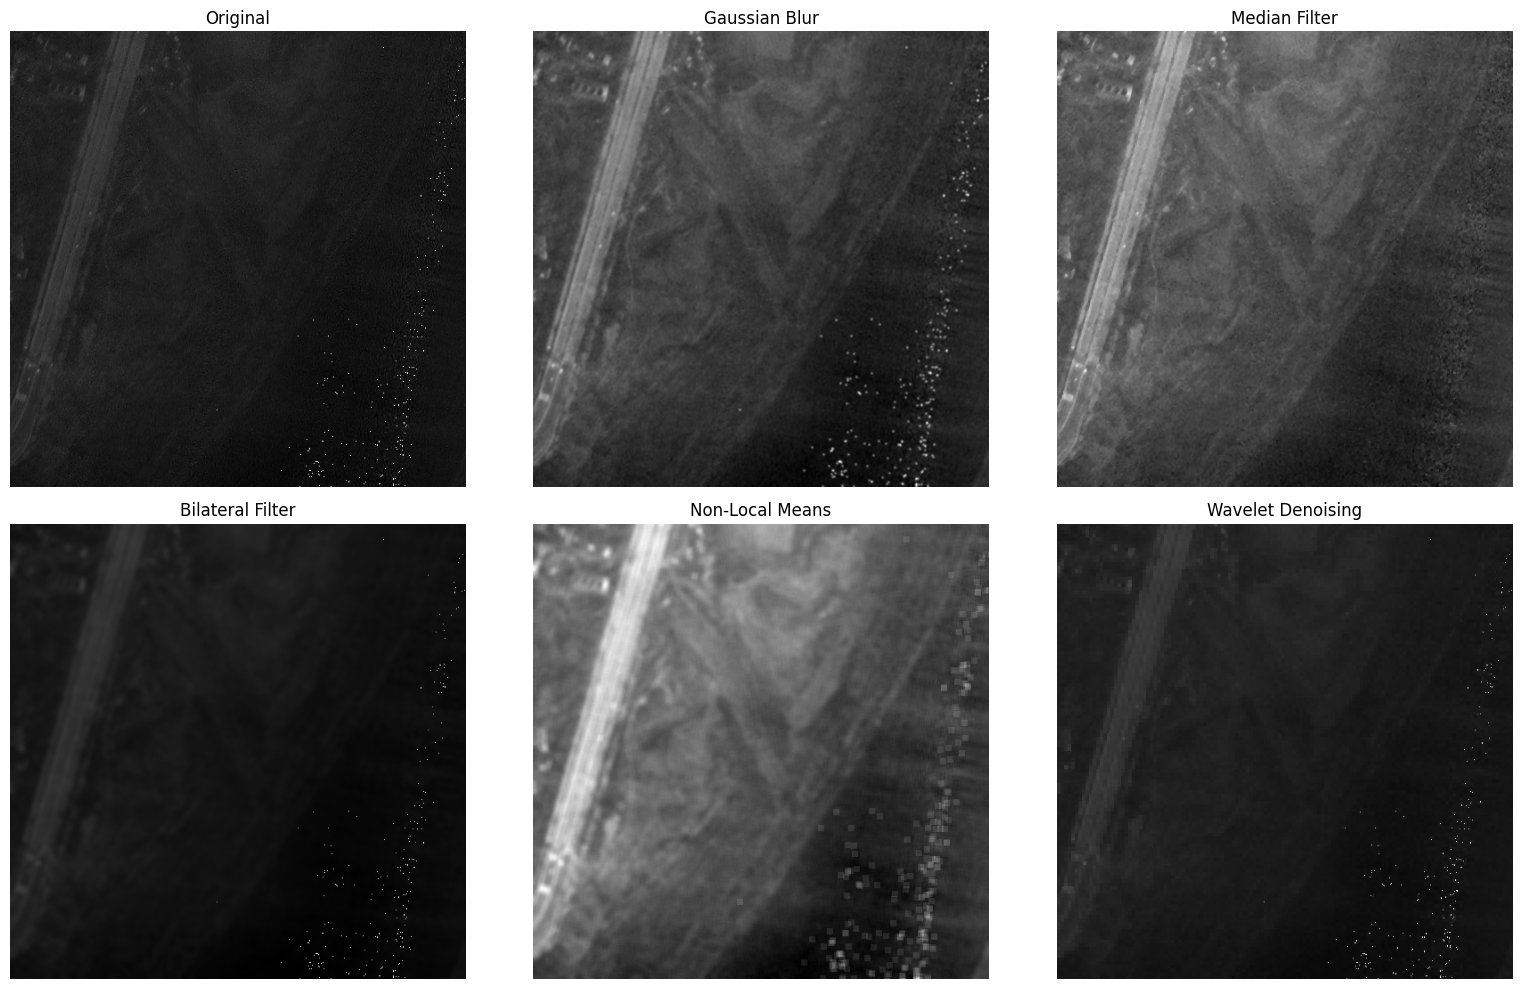

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
import pywt
import pywt.data

# Assume 'image' contains your loaded .rad image (already reshaped correctly)
original = image.astype(np.uint8)

# 1. Gaussian Blur
gaussian = cv2.GaussianBlur(original, (5, 5), 1)

# 2. Median Filter
median = cv2.medianBlur(original, 3)

# 3. Bilateral Filter
bilateral = cv2.bilateralFilter(original, 9, 75, 75)

# 4. Non-Local Means
sigma_est = np.mean(estimate_sigma(original, channel_axis=None))
nl_means = denoise_nl_means(original, h=1.15 * sigma_est, fast_mode=True,
                            patch_size=5, patch_distance=3, channel_axis=None)
nl_means = (nl_means * 255).astype(np.uint8)

# 5. Wavelet Denoising
def wavelet_denoise(img):
    coeffs = pywt.wavedec2(img, 'db1', level=2)
    coeffs = list(coeffs)
    # Fix the error by ensuring coeffs[1:] is a list of tuples of arrays
    coeffs[1:] = [tuple(pywt.threshold(c, 20, mode='soft') for c in level) for level in coeffs[1:]]
    return pywt.waverec2(coeffs, 'db1').astype(np.uint8)

wavelet = wavelet_denoise(original)

# 🖼️ Plot all
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
axs = axs.ravel()
titles = ['Original', 'Gaussian Blur', 'Median Filter', 'Bilateral Filter', 'Non-Local Means', 'Wavelet Denoising']
images = [original, gaussian, median, bilateral, nl_means, wavelet]

for i in range(6):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
import math
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr

# Function to compute PSNR
def calculate_psnr(original, denoised):
    return psnr(original, denoised, data_range=255)

# ✅ Calculate PSNR values
psnr_gaussian = calculate_psnr(original, gaussian)
psnr_median = calculate_psnr(original, median)
psnr_bilateral = calculate_psnr(original, bilateral)
psnr_nlmeans = calculate_psnr(original, nl_means)
psnr_wavelet = calculate_psnr(original, wavelet)

# ✅ Display PSNR results
print("🔎 PSNR Comparison:")
print(f"1. Gaussian Blur     : {psnr_gaussian:.2f} dB")
print(f"2. Median Filter     : {psnr_median:.2f} dB")
print(f"3. Bilateral Filter  : {psnr_bilateral:.2f} dB")
print(f"4. Non-Local Means   : {psnr_nlmeans:.2f} dB")
print(f"5. Wavelet Denoising : {psnr_wavelet:.2f} dB")


🔎 PSNR Comparison:
1. Gaussian Blur     : 31.41 dB
2. Median Filter     : 30.19 dB
3. Bilateral Filter  : 35.29 dB
4. Non-Local Means   : 29.93 dB
5. Wavelet Denoising : 34.51 dB


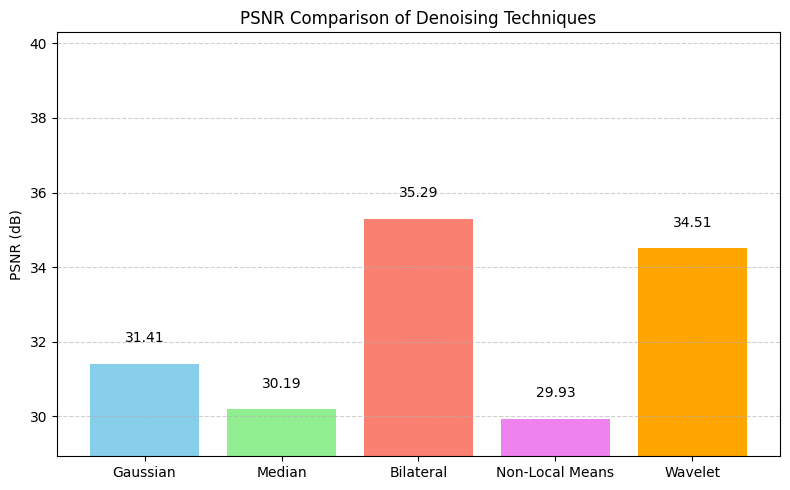

In [8]:
import matplotlib.pyplot as plt

# PSNR values (replace these with your actual results if needed)
psnr_values = [psnr_gaussian, psnr_median, psnr_bilateral, psnr_nlmeans, psnr_wavelet]
techniques = ['Gaussian', 'Median', 'Bilateral', 'Non-Local Means', 'Wavelet']

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(techniques, psnr_values, color=['skyblue', 'lightgreen', 'salmon', 'violet', 'orange'])

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('PSNR Comparison of Denoising Techniques')
plt.ylabel('PSNR (dB)')
plt.ylim(min(psnr_values) - 1, max(psnr_values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
